# Minimal example of esn library use

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from echo import esn

Original rho: 2.7565950169595532
40.201672053028624


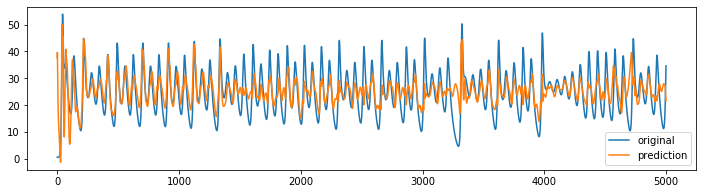

In [11]:
Data = esn.Data
Reservoir = esn.Reservoir

data = Data.create_source('lorenz')
x,y = data.generate(10000, seed=1)
model = Reservoir(100)
# model = Reservoir(500, rho=0.9, l2=0.001, leak=0.1)
#model = Reservoir(100, rho=None, l2=None)
print('Original rho:', model.meta['original_rho'])
model.fit(x, y, skip=200)

x,y = data.generate(5000, seed=0.5)
z = model.predict(x)
loss = esn.utils.loss(y[200:], z[200:])
print(loss)

plt.figure(figsize=(12,3));
plt.plot(y, label='original');
plt.plot(z, label='prediction');
plt.legend();

In [3]:
print(esn.utils.loss(y[200:], z[200:]))
m = np.mean(z[200:])
print(esn.utils.loss(y[200:], (z[200:]-m)*1.3+m))

1.8838010910194263
6.466675717741327
